In [4]:
#Import Dependencies
import pandas as pd
import os
import csv
import requests
import matplotlib.pyplot as plt
from config import api_key 
import json
import pprint
import kdtree
import random
import scipy.stats as sts

In [5]:
#Create connection for Open Weather Map 
#Identify location and URL logic for open weather map
url="http://api.openweathermap.org/data/2.5/weather?q="

#Create Request URLs and Variables
#city_name=""
key="&appid="+ api_key

#Obtain cities from PIP install 
_current_dir, _current_filename = os.path.split("C:\\Users\\porti\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>")
_world_cities_csv_path = os.path.join(_current_dir, 'worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}


In [6]:
print(url)

http://api.openweathermap.org/data/2.5/weather?q=


In [7]:
#Access Random City Data
with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)
    # discard the headers
    cities.__next__()
    city_list=[]
    random_cities=[]
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        city_list.append(city[1])
random_cities.append(random.choices(city_list,k=51))
random_cities

[['khujner',
  'kopstal',
  'allauch',
  'weiterstadt',
  'pilisvorosvar',
  'galesti',
  'susa',
  'batang berjuntai',
  'jollyville',
  'uttukkuli',
  'marion',
  'pemagatsel',
  'kielce',
  'krouson',
  'selaru',
  'klos',
  'glenn dale',
  'hamden',
  'omsk',
  'teisani',
  'harper woods',
  'saqqez',
  'huruesti',
  'werdau',
  'slawno',
  'shahpur city',
  'cairo',
  'tukuyu',
  'zitacuaro',
  'barcarena',
  'verbivka',
  'lyss',
  'los banos',
  'rodniki',
  'trjavna',
  'polo',
  'nonoichi',
  'dighwara',
  'sernovodskoye',
  'coron',
  'urla',
  'kiambu',
  'orikhiv',
  'tetoiu',
  'pinheiro',
  'didsbury',
  'chestermere',
  'mukerian',
  'bascaran',
  'vazante',
  'novopodrezkovo']]

In [21]:
#Build Open Weather Request URLs
response_list=[]
latitude=[]
temperature=[]
humidity=[]
cloudiness=[]
windspeed=[]
for city in random_cities:
    for cur_random_cities in random_cities:
        for city in cur_random_cities:
            city_data = requests.get(url+city+key).json()
            response_list.append(city_data)
response_list

[{'coord': {'lon': 76.6, 'lat': 23.78},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 298.98,
   'feels_like': 301.63,
   'temp_min': 298.98,
   'temp_max': 298.98,
   'pressure': 996,
   'humidity': 85,
   'sea_level': 996,
   'grnd_level': 948},
  'visibility': 10000,
  'wind': {'speed': 3.8, 'deg': 253},
  'rain': {'1h': 0.19},
  'clouds': {'all': 100},
  'dt': 1596504559,
  'sys': {'country': 'IN', 'sunrise': 1596500671, 'sunset': 1596548088},
  'timezone': 19800,
  'id': 1266632,
  'name': 'Khujner',
  'cod': 200},
 {'coord': {'lon': 6.07, 'lat': 49.66},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 285.66,
   'feels_like': 281.72,
   'temp_min': 284.82,
   'temp_max': 286.15,
   'pressure': 1014,
   'humidity': 76},
  'visibility': 10000,
  'wind': {'speed': 5.1, 'deg': 340},
  'clouds': {'all

In [22]:
try:
    for town in response_list:
        latitude.append(town["coord"]["lat"])
        temperature.append(town["main"]["temp"])
        cloudiness.append(town["clouds"]["all"])
        windspeed.append(town["wind"]["speed"])
        humidity.append(town["main"]["humidity"])
except:
    pass

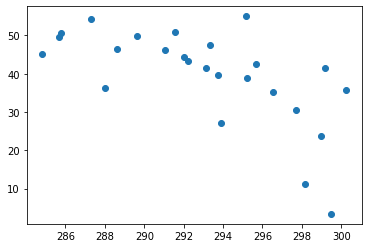

In [67]:
plt.scatter(temperature,latitude)
slope, intercept, r_value, p_value, std_err = sts.linregress(temperature,latitude)


LinregressResult(slope=-0.17961419229837727, intercept=52.723113199321865, rvalue=-0.2643825015390217, pvalue=0.20156531171866304, stderr=0.13661842940531718)

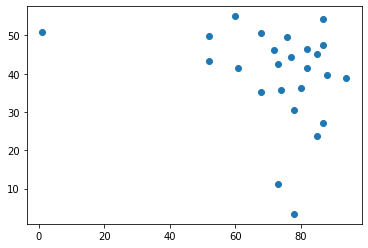

In [24]:
plt.scatter(humidity,latitude)
sts.linregress(humidity,latitude)

LinregressResult(slope=-0.0010643625962183587, intercept=39.68943390781794, rvalue=-0.003631010122394294, pvalue=0.9862566600019959, stderr=0.061121691371767546)

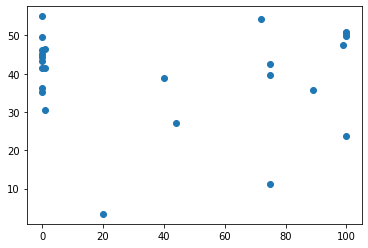

In [25]:
plt.scatter(cloudiness,latitude)
sts.linregress(cloudiness,latitude)

LinregressResult(slope=0.7449280573021277, intercept=37.46962630289442, rvalue=0.12030892455165755, pvalue=0.5667563771016035, stderr=1.2817005192027)

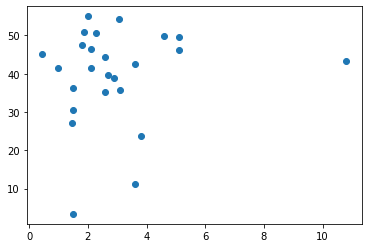

In [26]:
plt.scatter(windspeed,latitude)
sts.linregress(windspeed,latitude)